In [1]:
import pickle
import numpy as np
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from mpl_toolkits.mplot3d import Axes3D
from static_1Dfunction import *
import matplotlib
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
def plot_sols(sols,m):
    max_P=np.zeros(len(sols))
    mean_P=np.zeros(len(sols))
    Rains=np.zeros(len(sols))
    for i in range(len(sols)):
        max_P[i]=np.max(sols[i][1])
        mean_P[i]=np.mean(sols[i][1])
        Rains[i]=sols[i][0]
    print(L)
    fig,ax=plt.subplots(1,4,figsize=(20,5))
    #ax.plot(Rains,max_P,color='red',label='Maximum biomass')
    #ax.plot(Rains,mean_P,color='black',label='Mean biomass')
    ax[0].plot(Rains,max_P,color='red',marker='.',label='Maximum biomass')
    ax[0].plot(Rains,mean_P,color='black',marker='.',label='Mean biomass')
    ax[0].plot(sols[0][0],np.max(sols[0][1]),'o',color='red',label='Maximum biomass')
    ax[0].plot(sols[0][0],np.mean(sols[0][1]),'o',color='black',label='Mean biomass')
    ax[0].plot(sols[m][0],np.max(sols[m][1]),'^',color='green',label='Maximum biomass')
    ax[0].plot(sols[m][0],np.mean(sols[m][1]),'v',color='green',label='Mean biomass')
    ax[0].set_xlim(0,1.5)
    ax[0].set_ylim(0,20)
    ax[0].legend()
    ax[1].plot(x,sols[m][1])
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('P')
    ax[1].set_ylabel('Rain')
    ax[1].set_ylim((0,20))
    ax[2].plot(x,sols[m][2])
    ax[2].set_xlabel('x')
    ax[2].set_ylabel('W')
    ax[3].plot(x,sols[m][3])
    ax[3].set_xlabel('x')
    ax[3].set_ylabel('O')
    return()


In [2]:
#import
with open("L200/Rains_mode_tot.txt", "rb") as fp:   
    Rains_mode_tot = pickle.load(fp)

with open("L200/P_mode_tot.txt", "rb") as fp:   
    P_mode_tot = pickle.load(fp)

with open("L200/W_mode_tot.txt", "rb") as fp:   
    W_mode_tot = pickle.load(fp)

with open("L200/O_mode_tot.txt", "rb") as fp:   
    O_mode_tot = pickle.load(fp)

with open("L200/Stab_mode_tot.txt", "rb") as fp:   
    Stab_mode_tot = pickle.load(fp)

with open("L200/Lmb_mode_tot.txt", "rb") as fp:   
    Lmb_mode_tot = pickle.load(fp)
    
with open("L200/color_mode.txt", "rb") as fp:   
    color_mode = pickle.load(fp)
    
with open("L200/name_mode.txt", "rb") as fp:   
    name_mode = pickle.load(fp)
    
with open("L200/param.txt", "rb") as fp:   
    param = pickle.load(fp)

N_mode_main=5
N_mode=len(P_mode_tot)


Text(0, 0.5, '$\\kappa$')

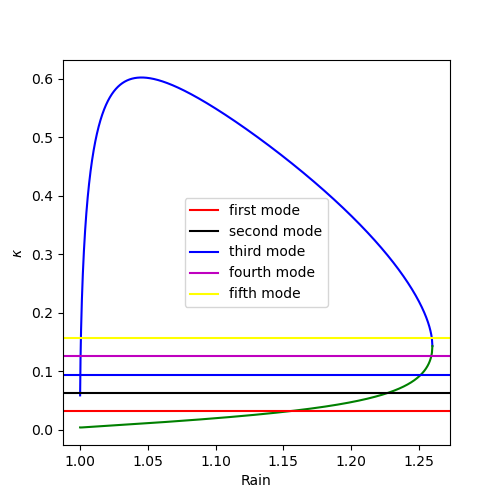

In [3]:
kappa=np.flip(np.loadtxt('Guesses1.dat'),axis=0)

L=200

N=200
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.plot(kappa[:,0],kappa[:,1],'b')
ax.plot(kappa[:,0],kappa[:,2],'g')
ax.axhline(2*np.pi/L,color='r',label='first mode')
ax.axhline(2*2*np.pi/L,color='k',label='second mode')
ax.axhline(3*2*np.pi/L,color='b',label='third mode')
ax.axhline(4*2*np.pi/L,color='m',label='fourth mode')
ax.axhline(5*2*np.pi/L,color='yellow',label='fifth mode')
ax.legend()
ax.set_xlabel('Rain')
ax.set_ylabel(r'$\kappa$')


20
20
20
20


Text(0.5, 0, 'Rain $[mm.d^{-1}$]')

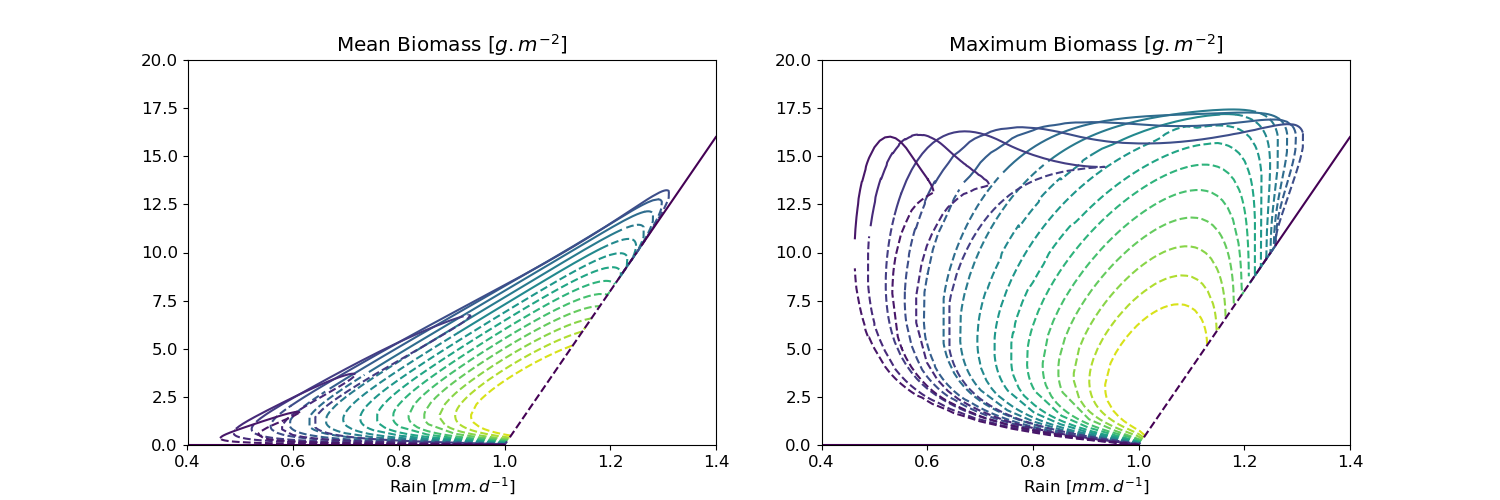

In [26]:
k=np.linspace(0,N_mode-3,N_mode-3+1)

norm = matplotlib.colors.Normalize(vmin=np.min(k),vmax=np.max(k))
# choose a colormap
c_m = matplotlib.cm.viridis
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

print(len(Stab_mode_tot))
print(len(Rains_mode_tot))
print(len(color_mode))
print(len(name_mode))
plt.rc('font', size=12) 
Zorder=-np.arange(0,N_mode)
fig,ax=plt.subplots(1,2,figsize=(15,5))
for i in range(N_mode-3):
    ax[0].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=s_m.to_rgba(k[i]),zorder=Zorder[i])
    ax[0].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),markersize=4,color=s_m.to_rgba(k[i]),label=name_mode[i],linestyle='solid',zorder=Zorder[i])
    ax[1].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=s_m.to_rgba(k[i]),zorder=Zorder[i])
    ax[1].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),markersize=2,color=s_m.to_rgba(k[i]),label=name_mode[i],zorder=Zorder[i])
ax[0].set_xlim(0.4,1.4)
ax[0].set_ylim(0,20)
ax[0].set_title('Mean Biomass $[g.m^{-2}]$')
ax[0].set_xlabel('Rain $[mm.d^{-1}]$')
#ax[0].legend()
ax[1].set_xlim(0.4,1.4)
ax[1].set_ylim(0,20)
ax[1].set_title('Maximum Biomass $[g.m^{-2}]$')
ax[1].set_xlabel('Rain $[mm.d^{-1}$]')
#ax[1].legend()


# Starting at the edge of the unstable zone for n=8

[257]


()

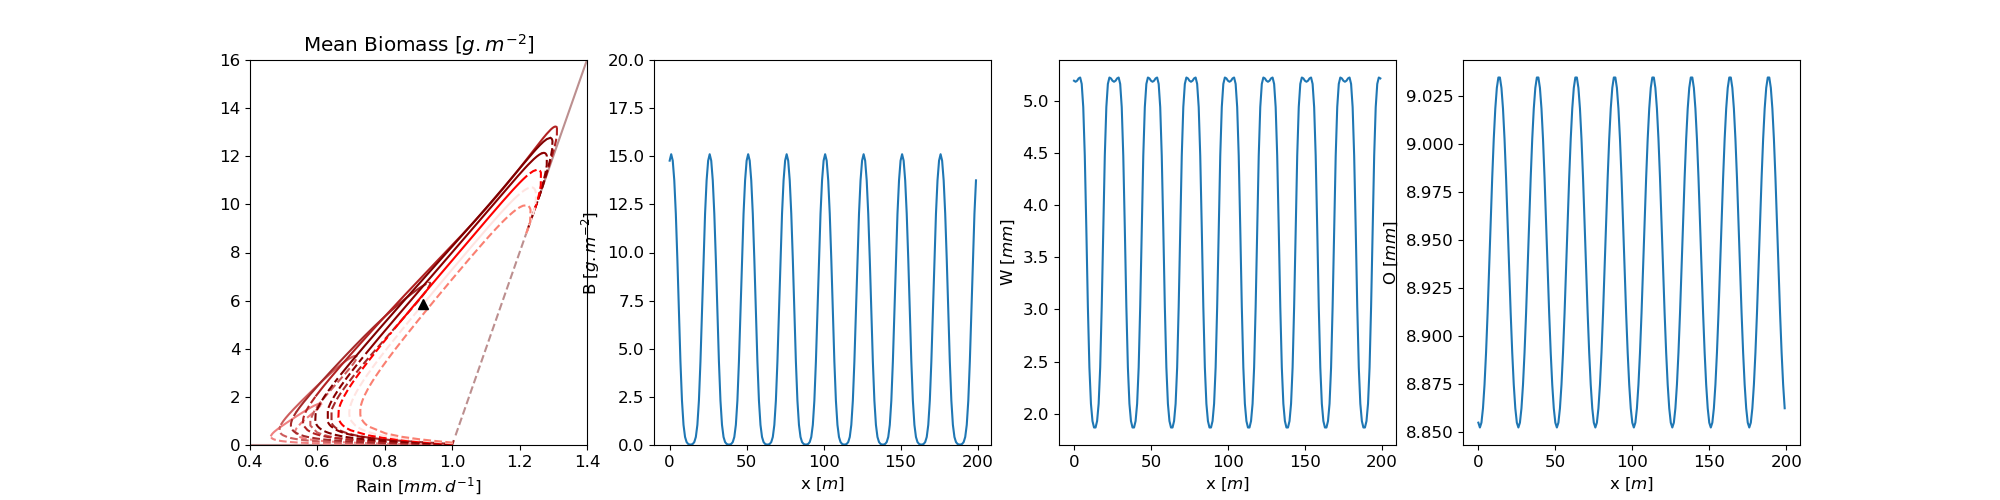

In [65]:
rain=0.9127
#rain=0.9227
n=0
n_mode=8
ind=selec_rain(rain,3,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
#Spatial grid
L=200
N=200
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)

show_equilibria(Rains_mode_tot,P_mode_tot,W_mode_tot,O_mode_tot,Stab_mode_tot,n_mode,ind,x,L,name_mode,color_mode,10)

In [66]:
eps=0.1
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
Rain=Rains_mode_tot[n_mode][ind]
Pg=np.squeeze(P_mode_tot[n_mode][ind]+eps*np.real(vec[:N,n]))
Wg=np.squeeze(W_mode_tot[n_mode][ind]+eps*np.real(vec[N:2*N,n]))
Og=np.squeeze(O_mode_tot[n_mode][ind]+eps*np.real(vec[2*N:,n]))

sols = [[Rain,Pg,Wg,Og]]


200


Text(0, 0.5, 'O')

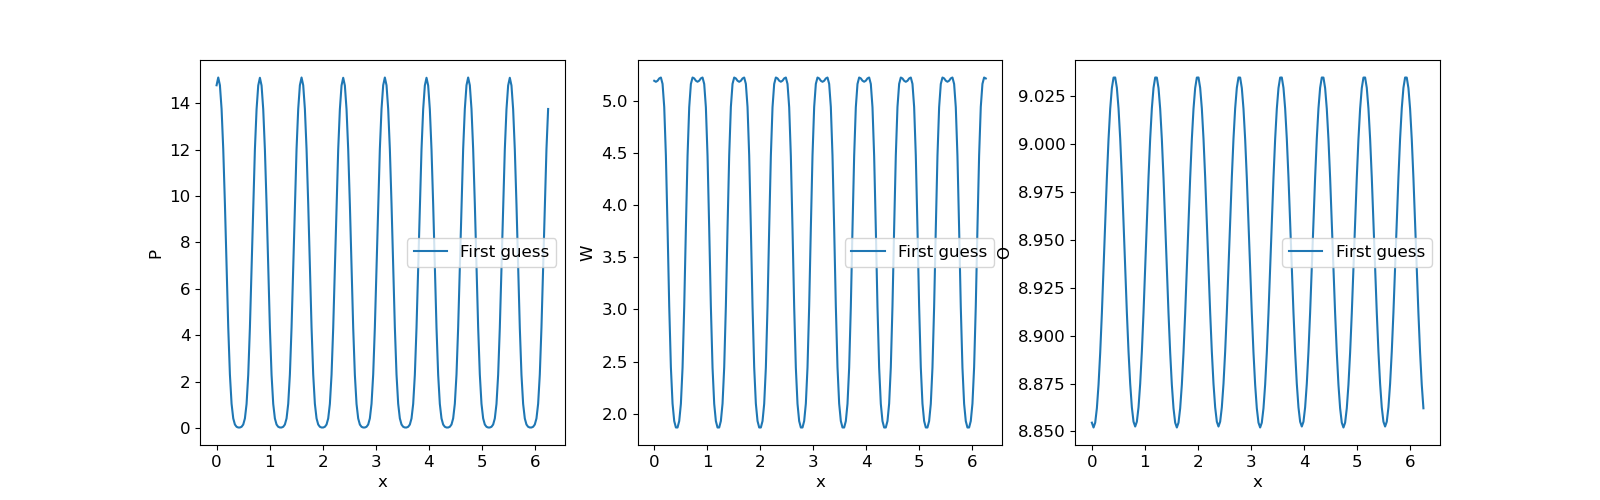

In [67]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

In [68]:
Rain=Rain+0.001
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)


In [69]:
sols = [[Rain,Pnew,Wnew,Onew]]
Rain,Pg,Wg,Og = sols[-1]
while Rain < 1.1:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-4,crit_source = 1e-6)
    sols.append([Rain,Pg,Wg,Og])


200
200


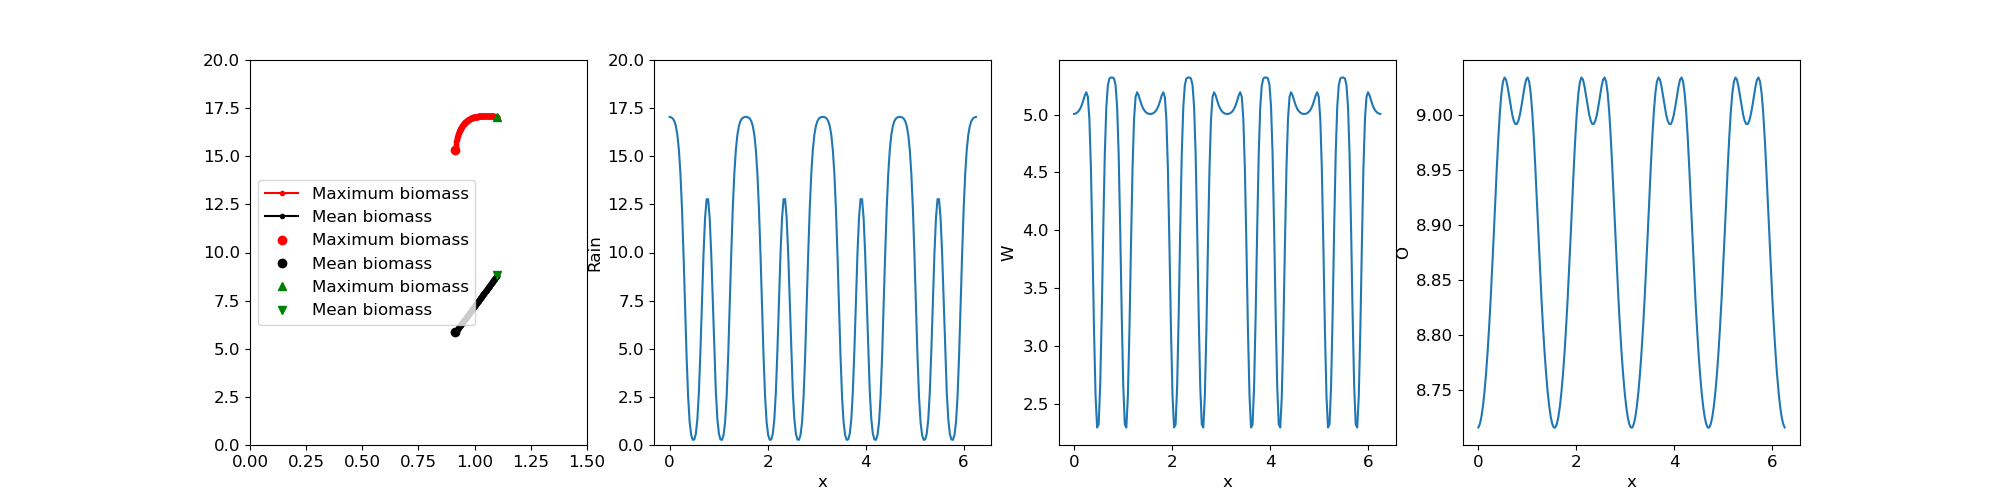

In [70]:
plot_sols(sols,-1)
print(L)

In [71]:
mode='eightbis'
save_RvsPWO(sols,'sols1','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','O',mode+'R0',int(np.round(L)))

In [72]:
Rain,Pg,Wg,Og = sols[-1]
Rain = Rain + 0.000
Pg = Pg + 0.0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols2 = [[Rain,Pnew,Wnew,Onew]]

[1.10083826]


In [73]:
Rain,Pg,Wg,Og = sols2[-1]
while Rain < 1.23:
    Rain = Rain+0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-3,crit_source = 1e-4)
    sols2.append([Rain,Pg,Wg,Og])


200


()

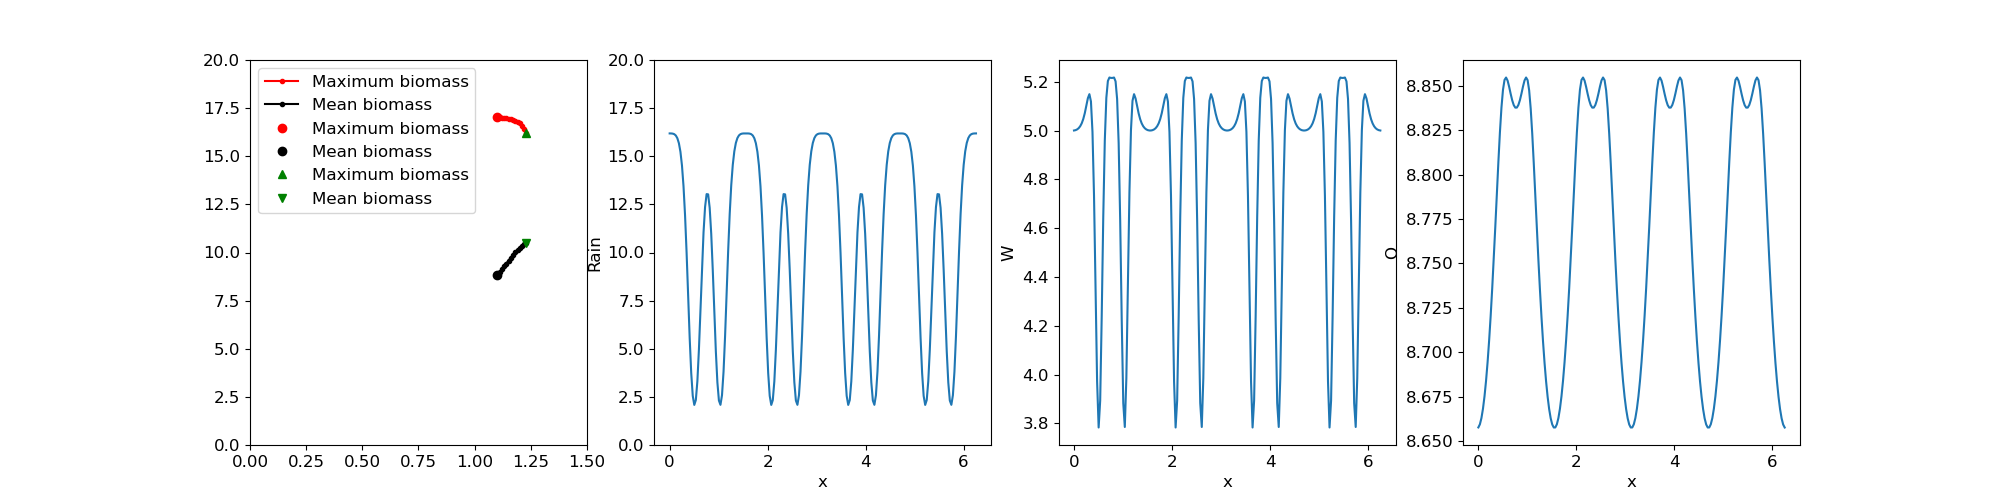

In [74]:
plot_sols(sols2,-1)

In [75]:
save_RvsPWO(sols2,'sols2','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','O',mode+'R0',int(np.round(L)))

In [76]:
Rain,Pg,Wg,Og = sols2[-1]
Rain = Rain + 0.000
Pg = Pg + 0.0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols3 = [[Rain,Pnew,Wnew,Onew]]

[1.23083826]


In [77]:
Rain,Pg,Wg,Og = sols3[-1]
while Rain < 1.245:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-3,crit_source = 1e-4)
    sols3.append([Rain,Pg,Wg,Og])


200


()

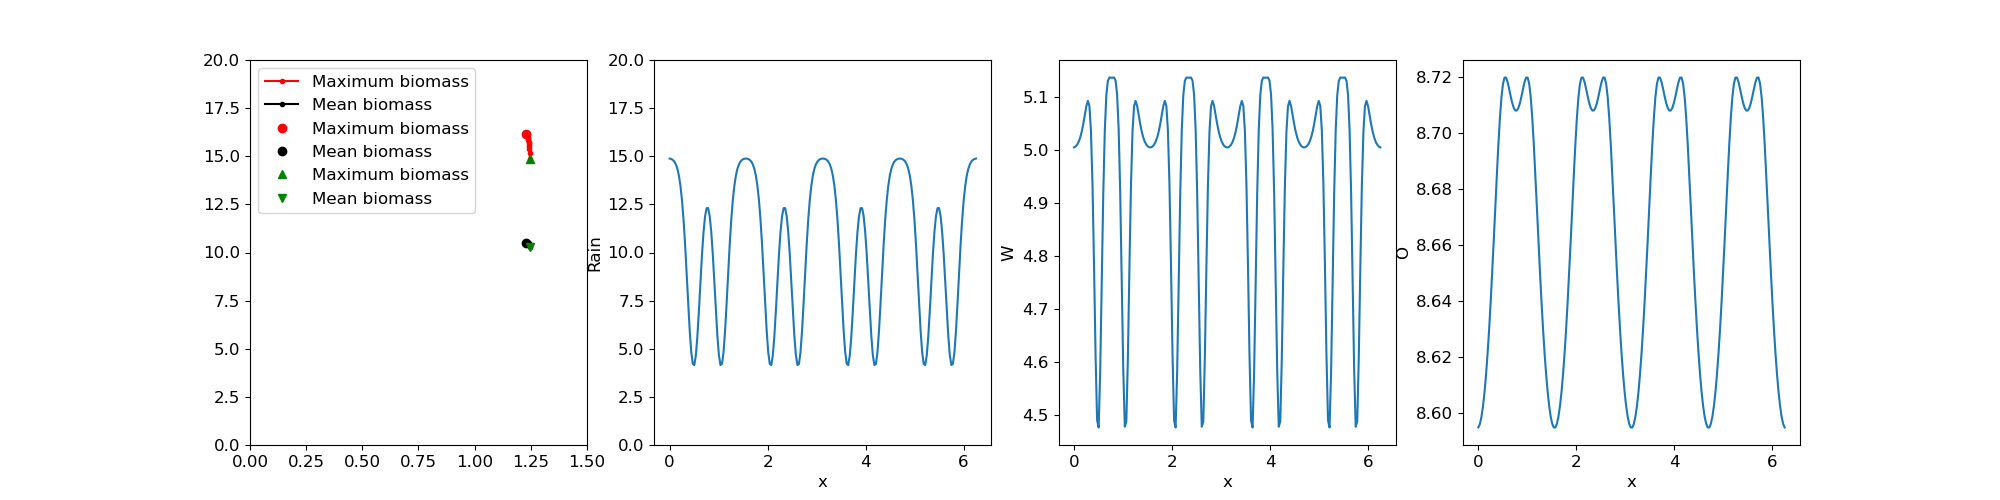

In [78]:
plot_sols(sols3,-1)

In [79]:
save_RvsPWO(sols3,'sols3','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','O',mode+'R0',int(np.round(L)))

In [80]:
Rain,Pg,Wg,Og = sols3[-1]
Rain = Rain - 0.001
Pg = Pg - 1
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols4 = [[Rain,Pnew,Wnew,Onew]]

[1.24483826]


In [81]:
Rain,Pg,Wg,Og = sols4[-1]
while Rain > 1.2:
    Rain = Rain-0.0001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-3,crit_source = 1e-4)
    sols4.append([Rain,Pg,Wg,Og])


200


()

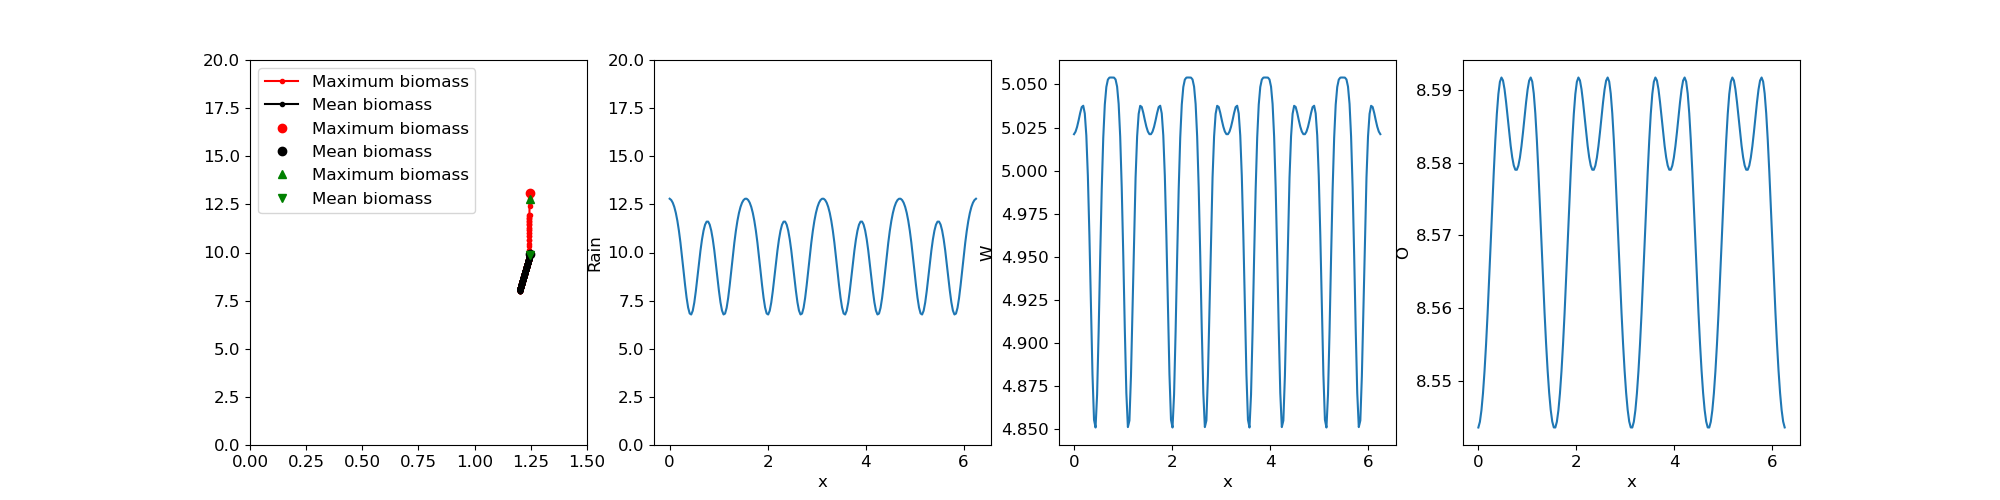

In [82]:
plot_sols(sols4,3)

In [83]:
save_RvsPWO(sols4,'sols4','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','O',mode+'R0',int(np.round(L)))

# Starting at the edge of the unstable zone for n=7

[70]


()

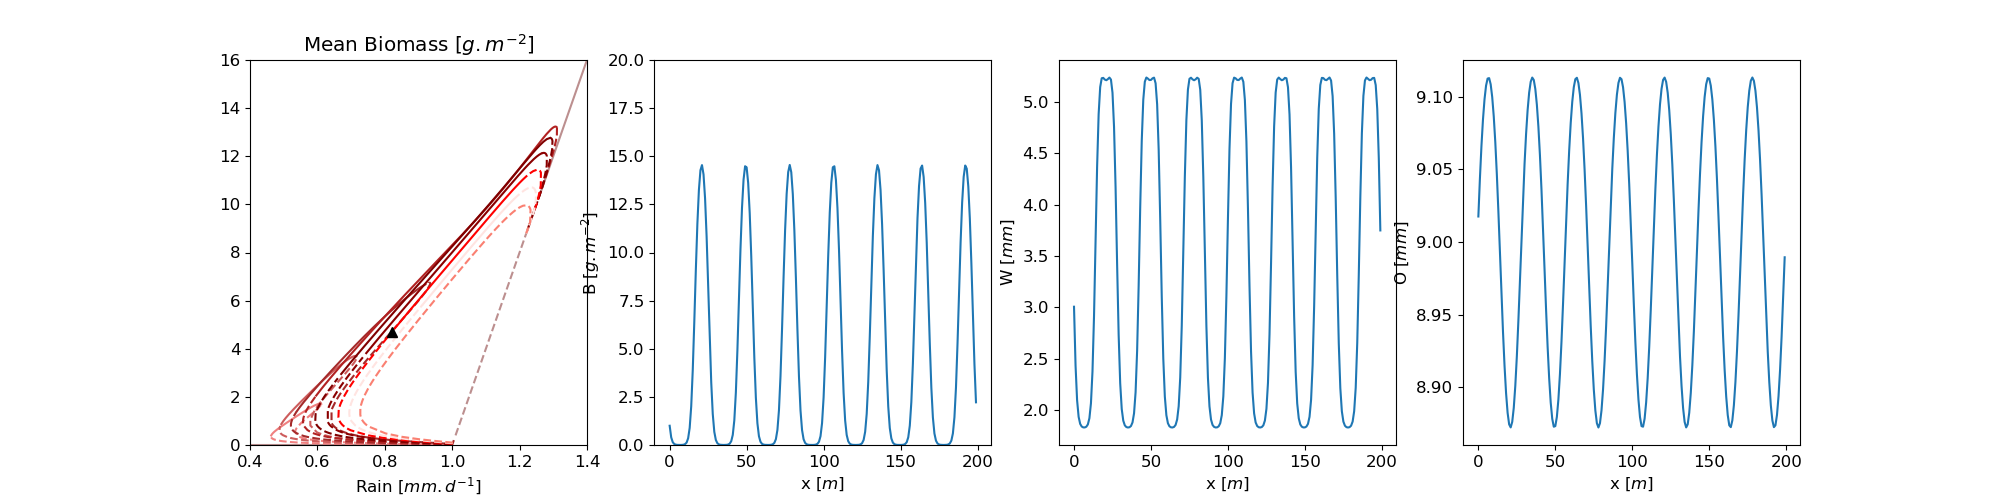

In [37]:
rain=0.825

n=0
n_mode=7
ind=selec_rain(rain,3,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
#Spatial grid
L=200
N=200
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)

show_equilibria(Rains_mode_tot,P_mode_tot,W_mode_tot,O_mode_tot,Stab_mode_tot,n_mode,ind,x,L,name_mode,color_mode,10)

In [38]:
eps=0.1
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
Rain=Rains_mode_tot[n_mode][ind]
Pg=np.squeeze(P_mode_tot[n_mode][ind]+eps*np.real(vec[:N,n]))
Wg=np.squeeze(W_mode_tot[n_mode][ind]+eps*np.real(vec[N:2*N,n]))
Og=np.squeeze(O_mode_tot[n_mode][ind]+eps*np.real(vec[2*N:,n]))

sols = [[Rain,Pg,Wg,Og]]


200


Text(0, 0.5, 'O')

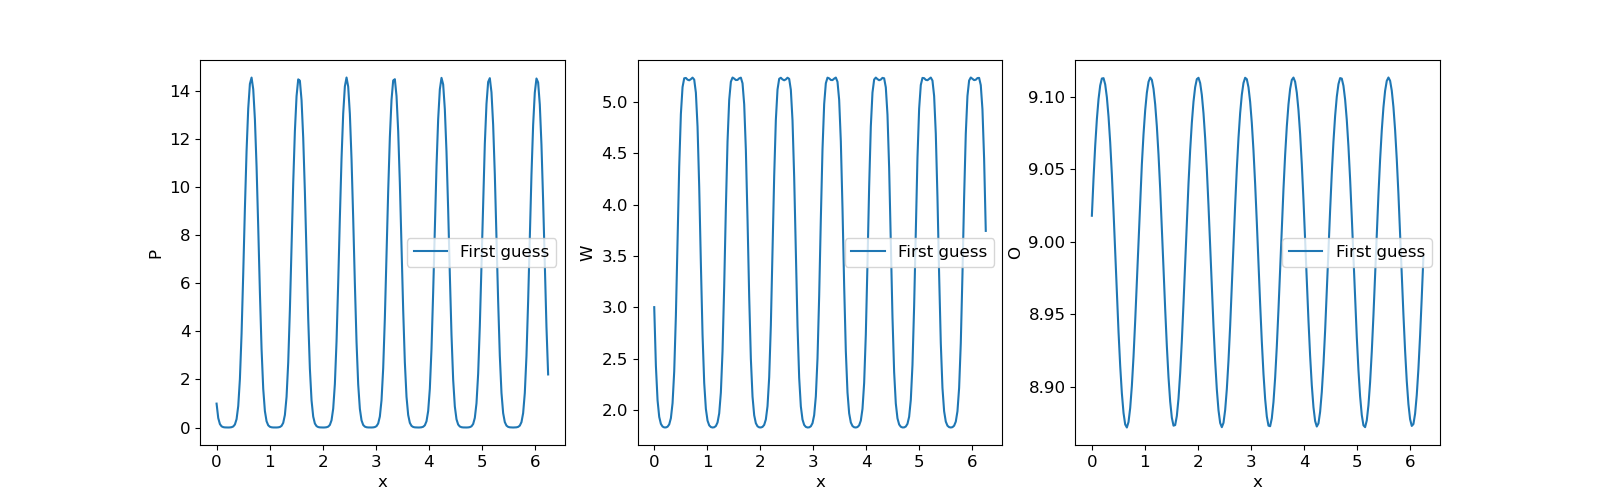

In [39]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

In [40]:
Rain=Rain+0.001
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)


In [41]:
sols = [[Rain,Pnew,Wnew,Onew]]
Rain,Pg,Wg,Og = sols[-1]
while Rain < 1.1:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-4,crit_source = 1e-6)
    sols.append([Rain,Pg,Wg,Og])


200
200


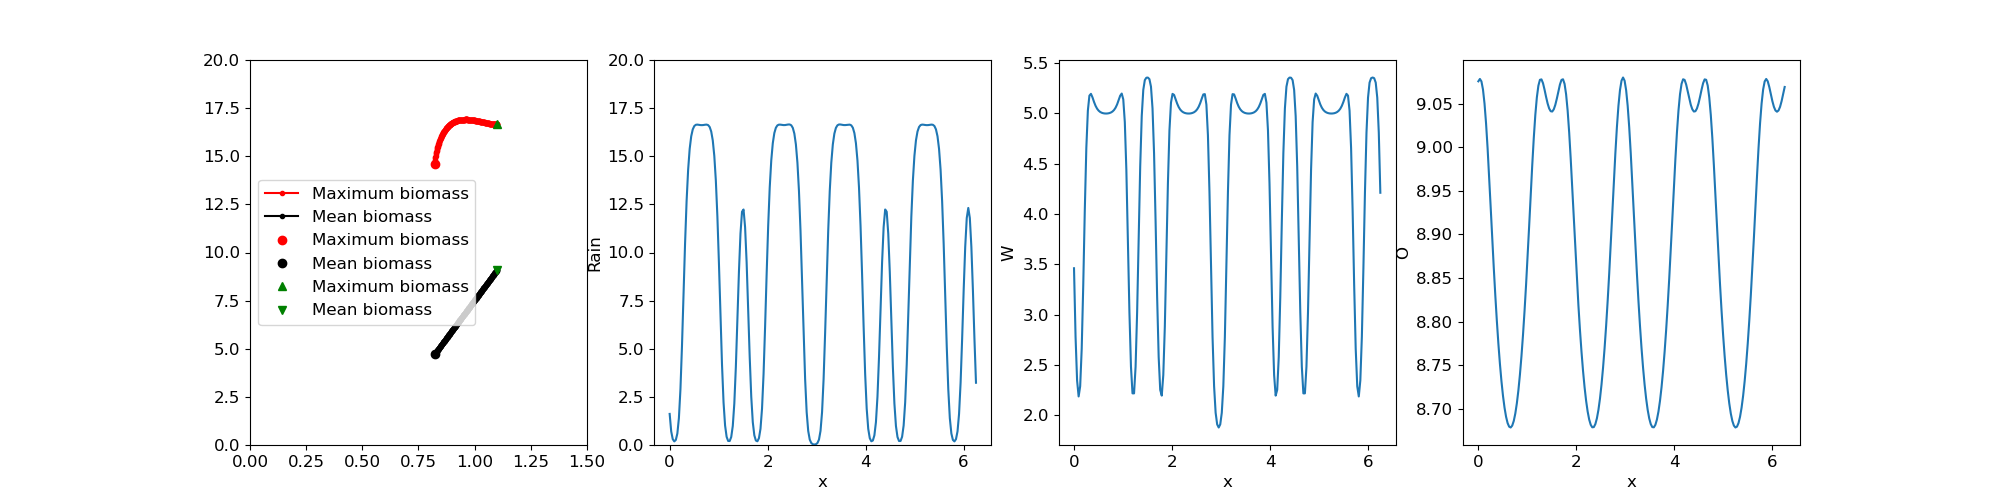

In [42]:
plot_sols(sols,-1)
print(L)

In [43]:
mode='sevenbis'
save_RvsPWO(sols,'sols1','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','O',mode+'R0',int(np.round(L)))

In [44]:
Rain,Pg,Wg,Og = sols[-1]
Rain = Rain + 0.000
Pg = Pg + 0.0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols2 = [[Rain,Pnew,Wnew,Onew]]

[1.100367]


In [45]:
Rain,Pg,Wg,Og = sols2[-1]
while Rain < 1.23:
    Rain = Rain+0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-3,crit_source = 1e-4)
    sols2.append([Rain,Pg,Wg,Og])


200


/tmp/ipykernel_126746/3939414730.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots(1,4,figsize=(20,5))


()

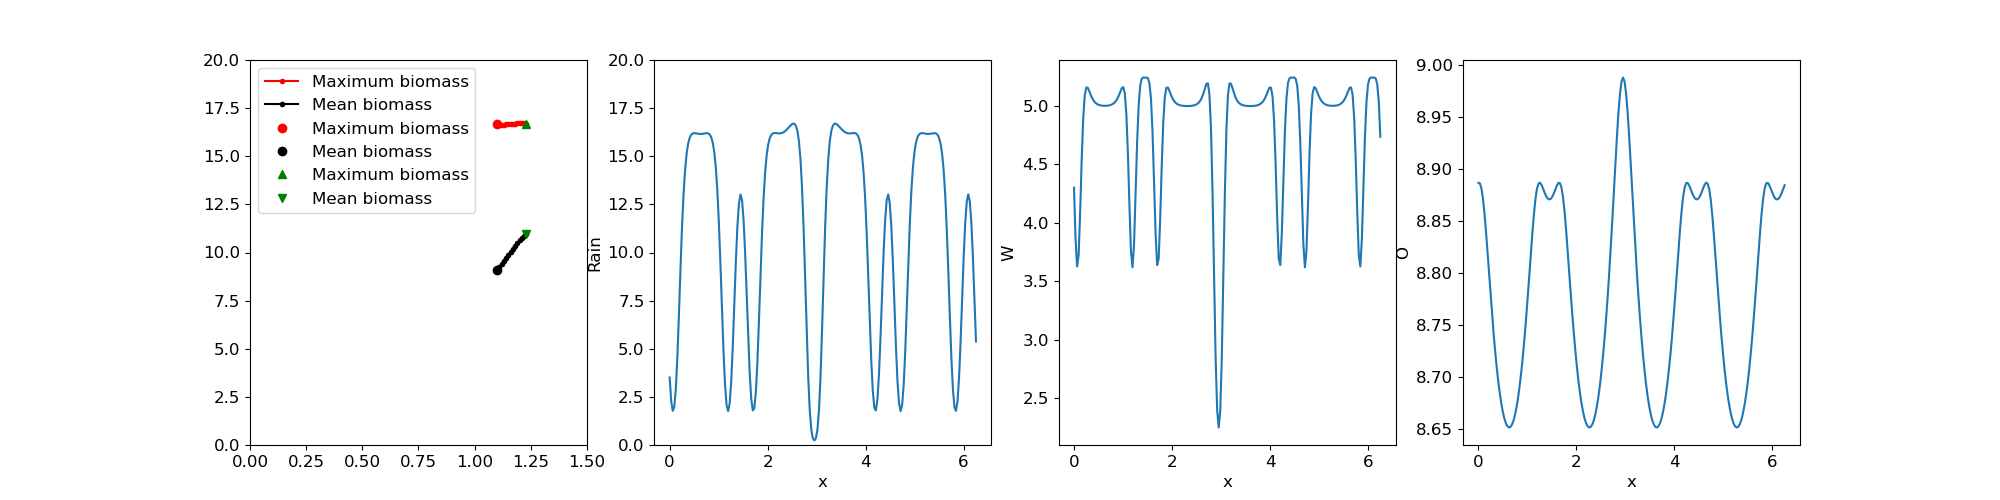

In [46]:
plot_sols(sols2,-1)

In [47]:
save_RvsPWO(sols2,'sols2','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','O',mode+'R0',int(np.round(L)))

In [51]:
Rain,Pg,Wg,Og = sols2[-1]
Rain = Rain + 0.000
Pg = Pg + 0.0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols3 = [[Rain,Pnew,Wnew,Onew]]

[1.230367]


In [52]:
Rain,Pg,Wg,Og = sols3[-1]
while Rain < 1.244:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-3,crit_source = 1e-4)
    sols3.append([Rain,Pg,Wg,Og])


200


()

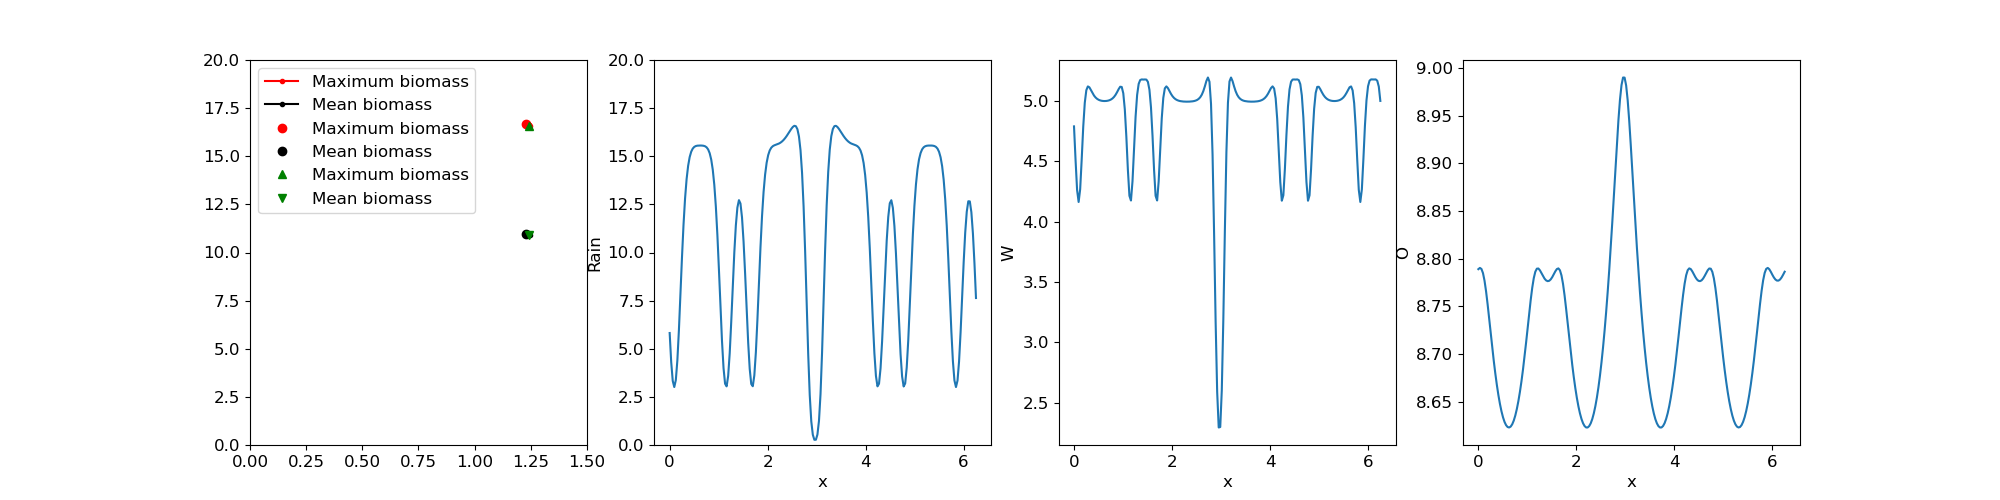

In [54]:
plot_sols(sols3,-2)

In [55]:
save_RvsPWO(sols3,'sols3','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','O',mode+'R0',int(np.round(L)))

In [59]:
Rain,Pg,Wg,Og = sols3[-1]
Rain = Rain - 0.001
Pg = Pg - 1
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols4 = [[Rain,Pnew,Wnew,Onew]]

[1.243367]


In [60]:
Rain,Pg,Wg,Og = sols4[-1]
while Rain > 1.243:
    Rain = Rain-0.0001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-3,crit_source = 1e-4)
    sols4.append([Rain,Pg,Wg,Og])


200


()

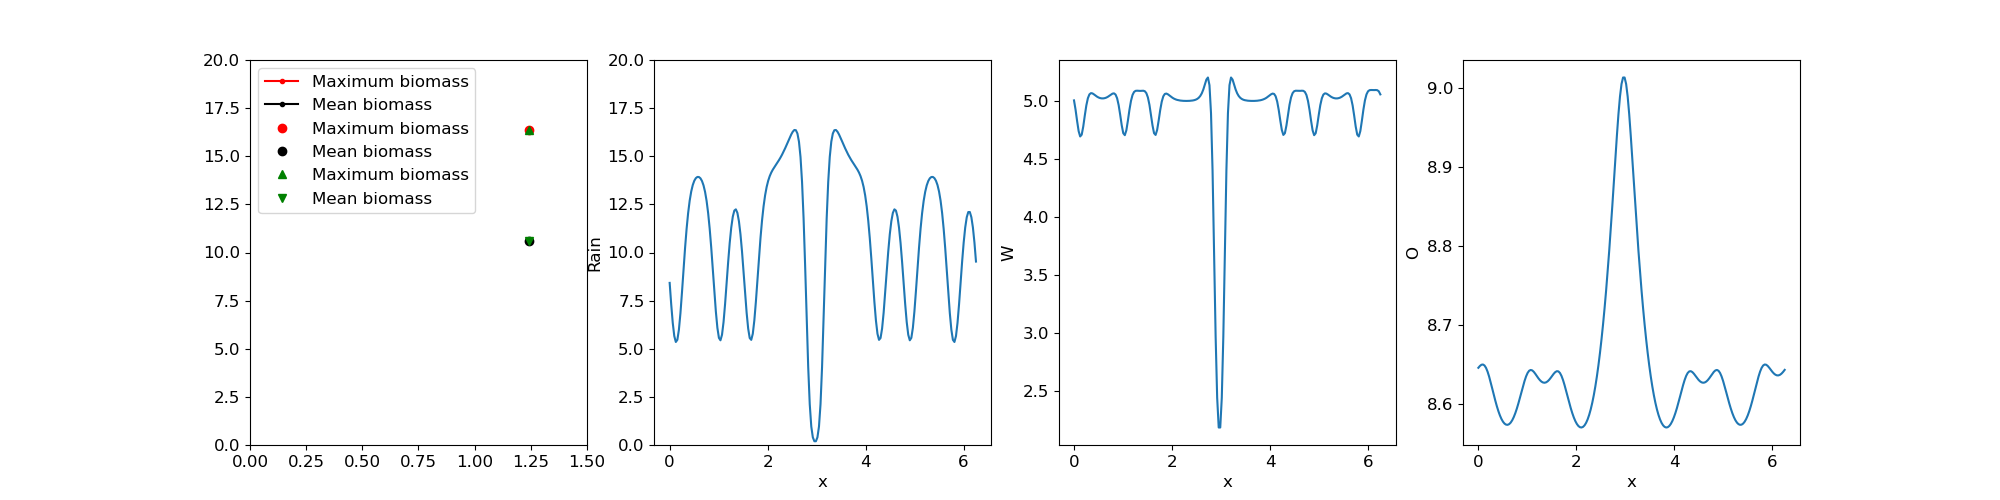

In [61]:
plot_sols(sols4,-1)

In [64]:
save_RvsPWO(sols4,'sols4','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','O',mode+'R0',int(np.round(L)))